# Individual Project 1 #
## Nik Mrdak ##

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
from datetime import datetime
import plotly.express as px

### Problem 1

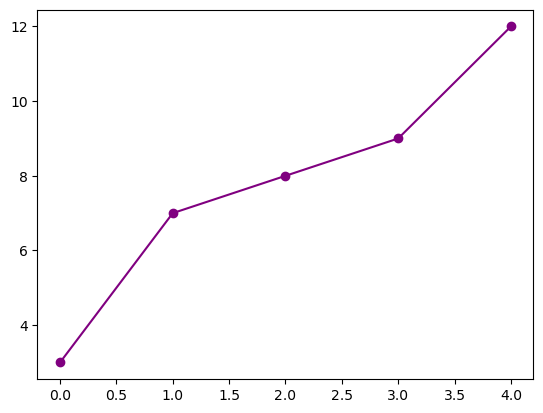

In [2]:
List = [3,7,8,9,12]

plt.plot(List, marker='o', color='purple')
plt.show()

### Problem 2

[42, 15, 75, 93, 58]
[18, 50, 62, 100, 47]


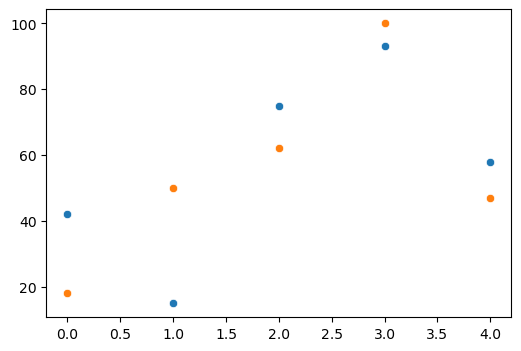

In [115]:
x=[]
y=[]

for r in range(5):
    x.append(random.randint(1,100))
for i in range(5):
    y.append(random.randint(1,100))
print(x)
print(y)


fig, axes = plt.subplots(1,1, figsize=(6,4))

sns.scatterplot(x)

sns.scatterplot(y)

plt.show()

### Problem 3

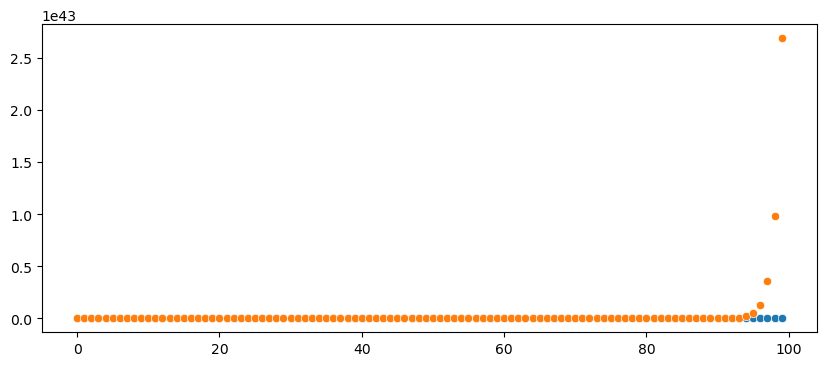

In [123]:
X = np.linspace(0.0,100.0,100).flatten()
X2 = (np.exp(X))

fig, axes = plt.subplots(1,1, figsize=(10,4))

sns.scatterplot(X)

sns.scatterplot(X2)

plt.show()

### Problem 4

In [6]:
car_sales = pd.read_csv('car-sales.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000"
1,Honda,Red,87899,4,"$5,000"
2,Toyota,Blue,32549,3,"$7,000"
3,BMW,Black,11179,5,"$22,000"
4,Nissan,White,213095,4,"$3,500"
5,Toyota,Green,99213,4,"$4,500"
6,Honda,Blue,45698,4,"$7,500"
7,Honda,Blue,54738,4,"$7,000"
8,Toyota,White,60000,4,"$6,250"
9,Nissan,White,31600,4,"$9,700"


In [7]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes


In [8]:
car_sales.isnull().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

### Problem 5

In [9]:
car_sales['Price']

0     $4,000
1     $5,000
2     $7,000
3    $22,000
4     $3,500
5     $4,500
6     $7,500
7     $7,000
8     $6,250
9     $9,700
Name: Price, dtype: object

In [10]:
car_sales['Price'] = car_sales['Price'].str.replace('$','',regex=False)
car_sales['Price'] = car_sales['Price'].str.replace(',','',regex=False)
#Literally took me three days to notice there was a comma in the price column preventing me from converting from object to int.

In [11]:
car_sales['Price'] = car_sales['Price'].astype('int64')
car_sales['Price']

0     4000
1     5000
2     7000
3    22000
4     3500
5     4500
6     7500
7     7000
8     6250
9     9700
Name: Price, dtype: int64

In [12]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


### Problem 6

In [15]:
car_sales['Total_Sales'] = car_sales['Price'].cumsum(axis=0)
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Total_Sales
0,Toyota,White,150043,4,4000,4000
1,Honda,Red,87899,4,5000,9000
2,Toyota,Blue,32549,3,7000,16000
3,BMW,Black,11179,5,22000,38000
4,Nissan,White,213095,4,3500,41500
5,Toyota,Green,99213,4,4500,46000
6,Honda,Blue,45698,4,7500,53500
7,Honda,Blue,54738,4,7000,60500
8,Toyota,White,60000,4,6250,66750
9,Nissan,White,31600,4,9700,76450


### Problem 7

In [20]:
car_sales['Sale_Date'] = pd.date_range(start=datetime.today(), periods =len(car_sales)).strftime('%Y-%m-%d')
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Total_Sales,Sale_Date
0,Toyota,White,150043,4,4000,4000,2024-09-29
1,Honda,Red,87899,4,5000,9000,2024-09-30
2,Toyota,Blue,32549,3,7000,16000,2024-10-01
3,BMW,Black,11179,5,22000,38000,2024-10-02
4,Nissan,White,213095,4,3500,41500,2024-10-03
5,Toyota,Green,99213,4,4500,46000,2024-10-04
6,Honda,Blue,45698,4,7500,53500,2024-10-05
7,Honda,Blue,54738,4,7000,60500,2024-10-06
8,Toyota,White,60000,4,6250,66750,2024-10-07
9,Nissan,White,31600,4,9700,76450,2024-10-08


### Problem 8

<function matplotlib.pyplot.show(close=None, block=None)>

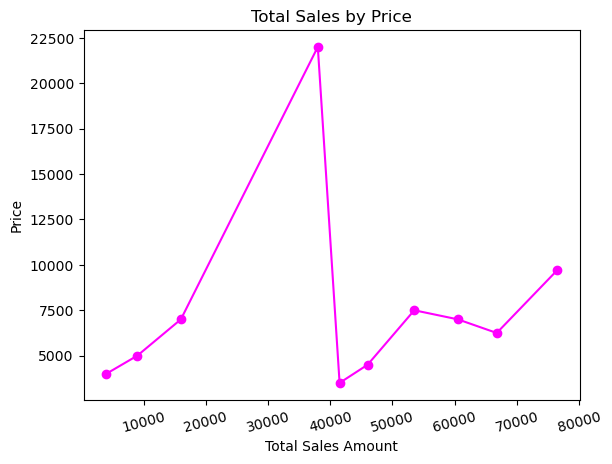

In [59]:
price_by_sales = car_sales.groupby('Total_Sales')['Price'].mean()
price_by_sales.plot(kind='line', marker = 'o', color = 'magenta')

plt.xlabel('Total Sales Amount')
plt.ylabel('Price')
plt.title('Total Sales by Price')
plt.xticks(rotation=15)
plt.show

### Problem 9

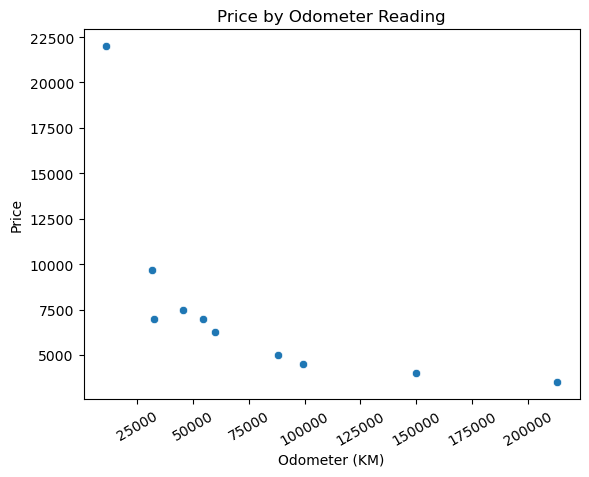

In [75]:
sns.scatterplot(x=car_sales['Odometer (KM)'], y=car_sales['Price'])
plt.title('Price by Odometer Reading')
plt.xticks(rotation=30)
plt.show()

### Problem 10

In [46]:
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price', 'Total_Sales',
       'Sale_Date'],
      dtype='object')

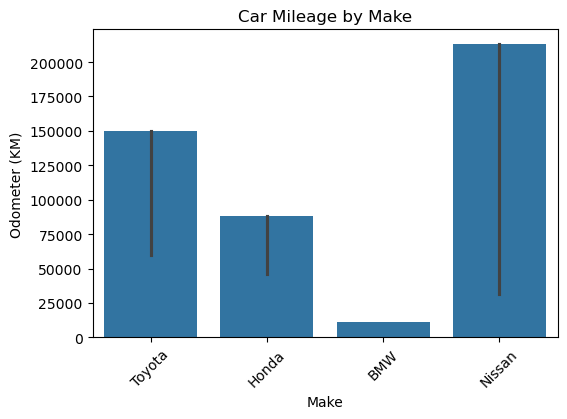

In [76]:
plt.figure(figsize=(6,4))
sns.barplot(x=car_sales['Make'], y=car_sales['Odometer (KM)'], estimator=max)
plt.xticks(rotation=45)
plt.title('Car Mileage by Make')
plt.show()

### Problem 11

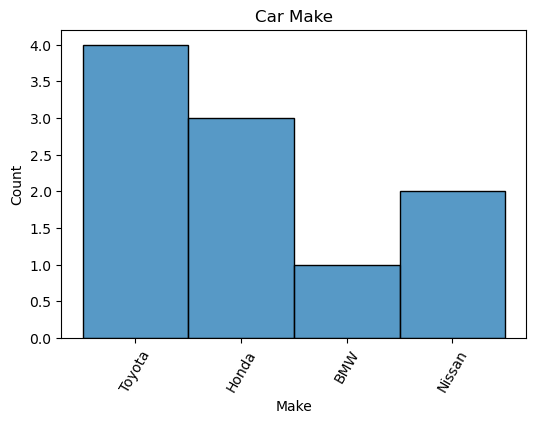

In [78]:
plt.figure(figsize=(6,4))
sns.histplot(car_sales['Make'])
plt.title('Car Make')
plt.xticks(rotation=60)
plt.show()

### Problem 12

Text(0.5, 1.0, 'Car Make')

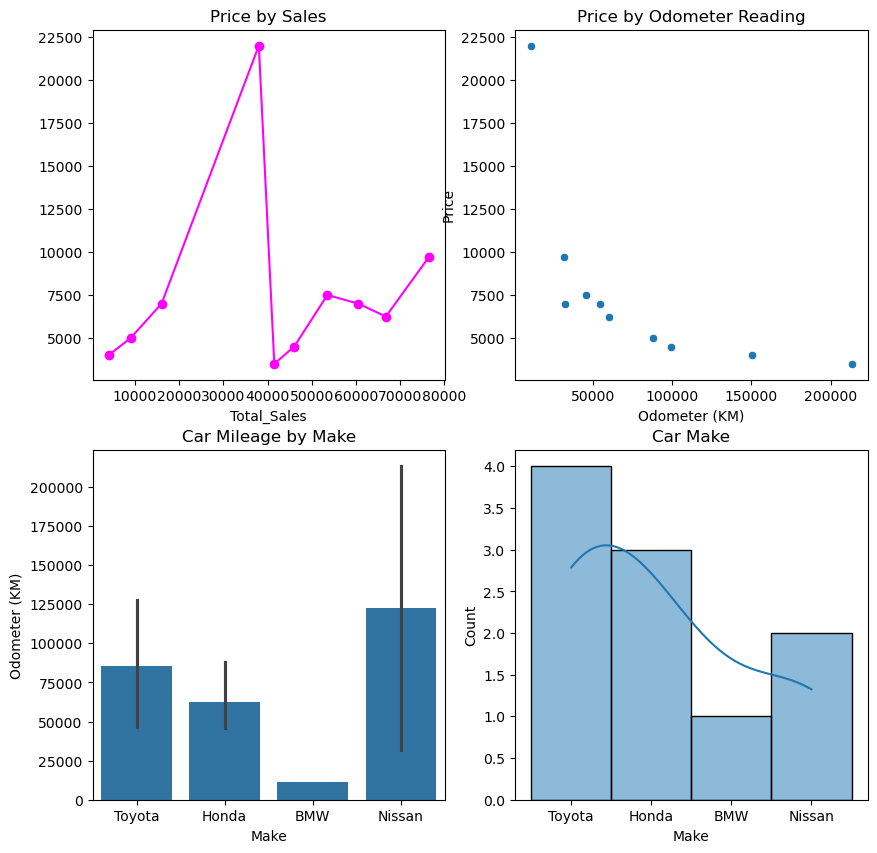

In [83]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))



# First plot - Bar plot for 'sex' column

price_by_sales = car_sales.groupby('Total_Sales')['Price'].mean()
price_by_sales.plot(kind='line', marker = 'o', color = 'magenta', ax=axes[0, 0])

axes[0, 0].set_title('Price by Sales')



# Second plot - Histogram for 'age' column

sns.scatterplot(x=car_sales['Odometer (KM)'], y=car_sales['Price'], ax=axes[0, 1])

axes[0, 1].set_title('Price by Odometer Reading')



# Third plot - Count plot for 'class' column

sns.barplot(x=car_sales['Make'], y=car_sales['Odometer (KM)'], ax=axes[1, 0])

axes[1, 0].set_title('Car Mileage by Make')



# Fourth plot - Histogram for 'fare' column

sns.histplot(car_sales['Make'], kde=True, ax=axes[1, 1])

axes[1, 1].set_title('Car Make')

### Problem 13

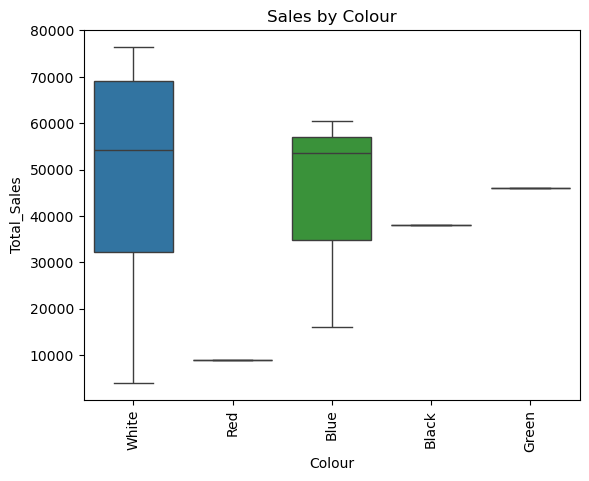

In [89]:
sns.boxplot(x=car_sales['Colour'], y=car_sales['Total_Sales'], hue=car_sales['Colour'])
plt.title('Sales by Colour')
plt.xticks(rotation=90)
plt.show()

### Problem 14

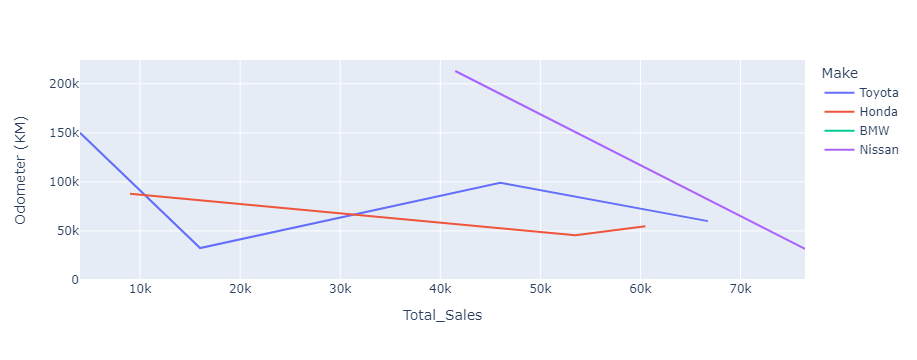

In [108]:
px.line(car_sales, x='Total_Sales', y='Odometer (KM)', color="Make")

### Problem 15

In [90]:
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price', 'Total_Sales',
       'Sale_Date'],
      dtype='object')

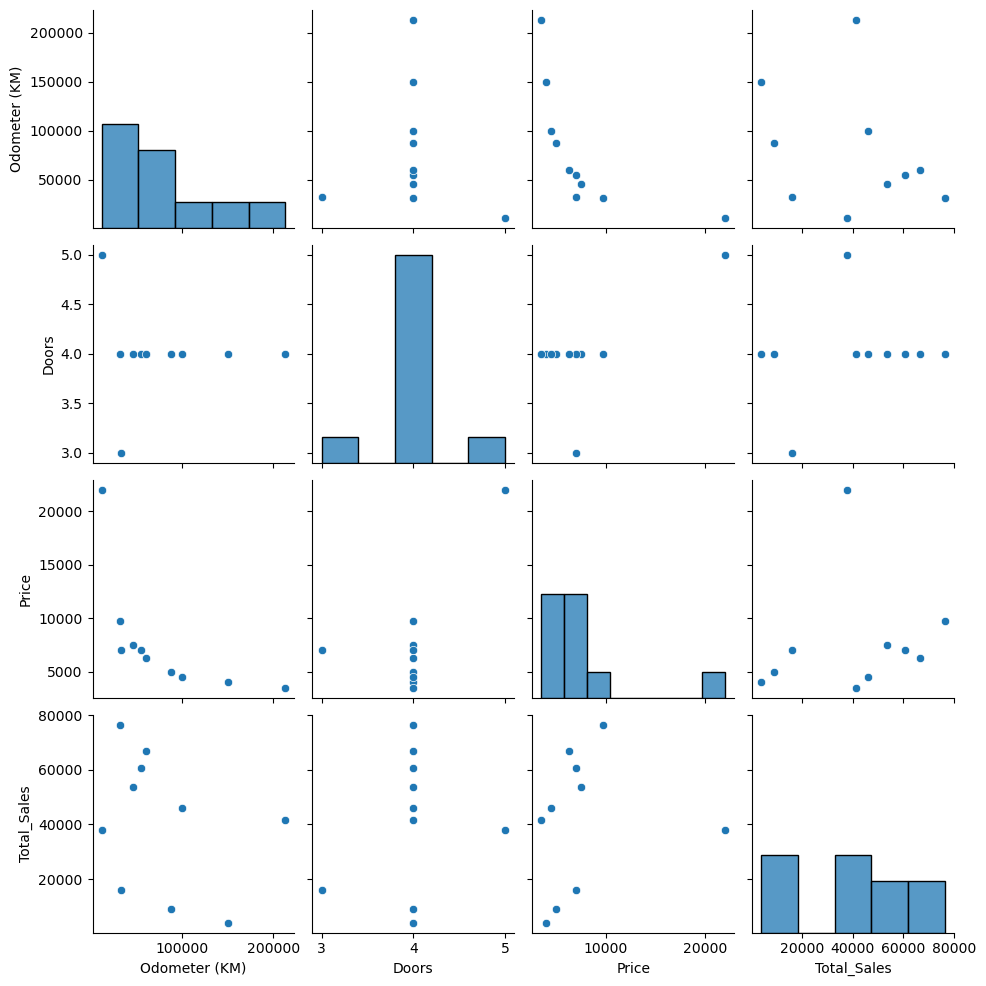

In [93]:
sns.pairplot(car_sales[['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price', 'Total_Sales', 'Sale_Date']])

### Problem 16

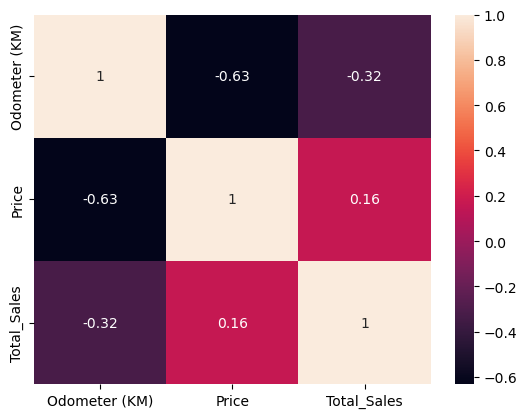

In [102]:
matrix = car_sales[['Odometer (KM)', 'Price', 'Total_Sales']].corr()
corr_matrix = sns.heatmap(matrix, annot = True)

Based on the correlation heatmap, the two factors with the strongest correlation are between price and odometer reading. 
We can infer that the higher a car's odometer reading, the lower the sale price of the car; they have an inverse relationship.